In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1,figsize=(8, 6))
torch.manual_seed(1)

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)


In [7]:
def save():
    # save net 1 
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1))
    
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.25)
    loss_func = torch.nn.MSELoss()
    
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Plot result
    plt.subplot(131)
    plt.title('Net-1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    # 2 ways to save the network
    torch.save(net1, 'net.pkl') # Save entire net
    torch.save(net1.state_dict(), 'net_params.pkl') # Save only the parameters

In [13]:
def restore_net():
    # Restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    
    # Plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [14]:
def restore_params():
    # Restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1))
    
    # Copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    
    # Plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

Wall time: 37.6 ms


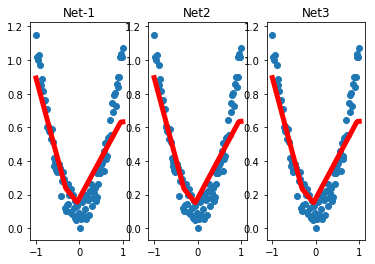

Wall time: 191 ms


In [21]:
# Train and save net1
save()
# Restore entire net (may be slow)
%time restore_net()

# Restore only the net parameters
%time restore_params()